<a href="https://colab.research.google.com/github/rpark3/ECON3916-Statistical-Machine-Learning/blob/main/Lab_2_FRED_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#install the FRED API library
!pip install fredapi

In [8]:
#install the FRED API library
!pip install fredapi
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='7012cb0f0a29fcbffe88ef60c40de610')


In [9]:
# 1. Fetch the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031
2025-12-01         31.76  326.030


In [10]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-07-01         31.35  322.132  31.729355
2025-08-01         31.45  323.364  31.709292
2025-09-01         31.52  324.368  31.681502
2025-11-01         31.73  325.031  31.827524
2025-12-01         31.76  326.030  31.760000


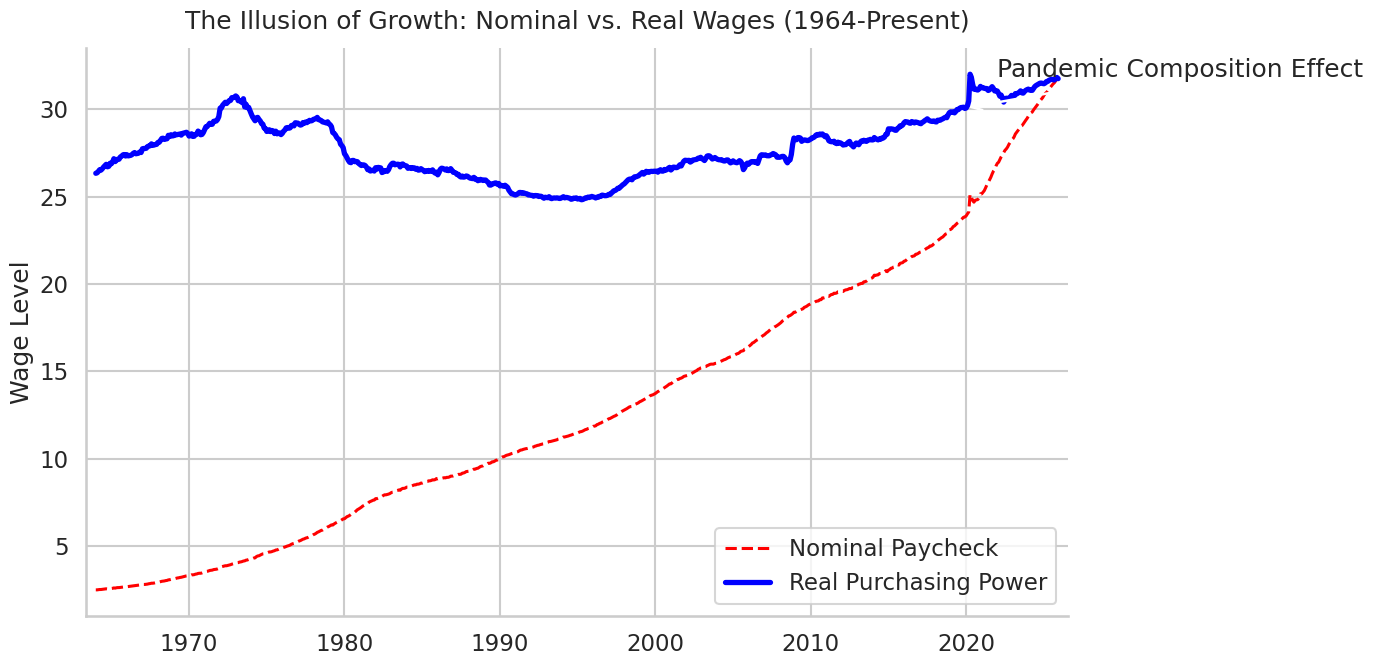

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Theme / layout ---
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot lines ---
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    linewidth=2.2,
    color="red",
    label="Nominal Paycheck"
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    linewidth=3.8,
    color="blue",
    label="Real Purchasing Power"
)

# --- Title / labels ---
ax.set_title(
    "The Illusion of Growth: Nominal vs. Real Wages (1964-Present)",
    pad=14
)
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

# --- Annotation: exact 2020 point ---
pandemic_date = pd.Timestamp("2020-01-01")  # change if your index uses a different 2020 date

if pandemic_date in df.index:
    x_2020 = pandemic_date
    y_2020 = df.loc[pandemic_date, "Real_Wage"]

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(x_2020, y_2020),
        xytext=(x_2020 + pd.DateOffset(years=2), y_2020 * 1.05),
        arrowprops=dict(arrowstyle="->", linewidth=1.8),
        ha="left",
        va="bottom"
    )

# --- Finishing touches ---
ax.legend(frameon=True, loc="best")
ax.margins(x=0.01)
sns.despine()
plt.tight_layout()
plt.show()

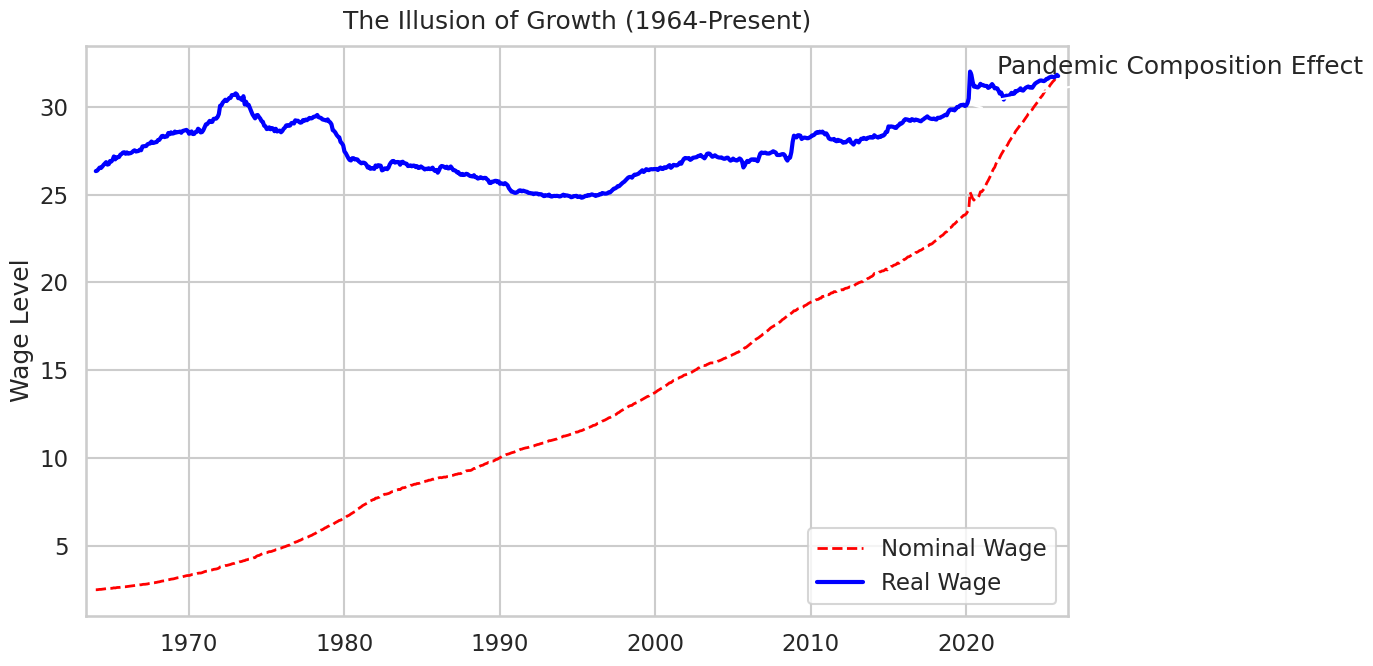

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Figure setup ---
fig, ax = plt.subplots(figsize=(14, 7))

# --- Plot lines ---
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage"
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage"
)

# --- Title ---
ax.set_title("The Illusion of Growth (1964-Present)", pad=12)
ax.set_xlabel("")
ax.set_ylabel("Wage Level")

# --- Annotation: 2020 spike ---
pandemic_date = pd.Timestamp("2020-01-01")  # adjust if your index uses a different 2020 date

if pandemic_date in df.index:
    x_2020 = pandemic_date
    y_2020 = df.loc[pandemic_date, "Real_Wage"]

    ax.annotate(
        "Pandemic Composition Effect",
        xy=(x_2020, y_2020),
        xytext=(x_2020 + pd.DateOffset(years=2), y_2020 * 1.05),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        ha="left",
        va="bottom"
    )

# --- Final touches ---
ax.legend()
ax.margins(x=0.01)
plt.tight_layout()
plt.show()

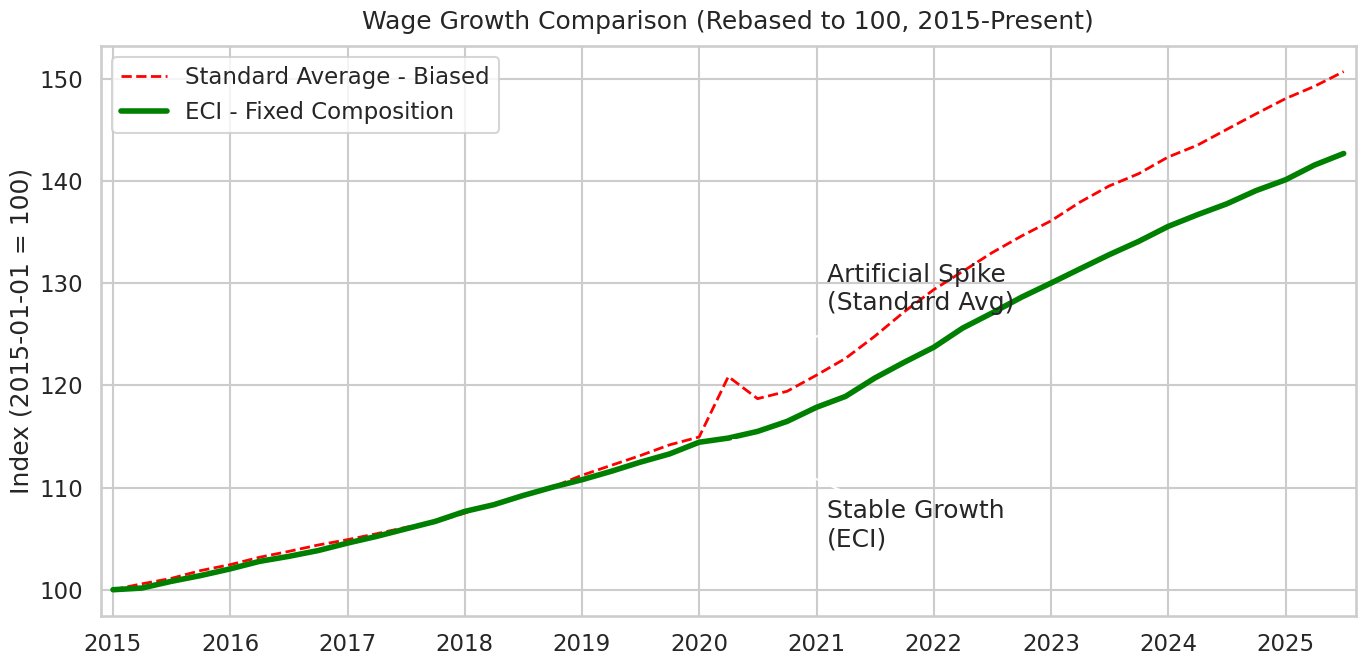

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch ECI wage series from FRED
eci = fred.get_series("ECIWAG")
eci.index = pd.to_datetime(eci.index)

# Ensure wages has a DatetimeIndex
wages = wages.copy()
wages.index = pd.to_datetime(wages.index)

# 2) Filter from 2015-01-01 onwards
start = pd.Timestamp("2015-01-01")
w = wages.loc[wages.index >= start].dropna()
e = eci.loc[eci.index >= start].dropna()

# Align on common dates (important if frequencies differ)
w, e = w.align(e, join="inner")

# 3) Rebase both to 100
w_rebased = (w / w.iloc[0]) * 100
e_rebased = (e / e.iloc[0]) * 100

# 4) Plot
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(
    w_rebased.index, w_rebased.values,
    color="red", linestyle="--", linewidth=2,
    label="Standard Average - Biased"
)
ax.plot(
    e_rebased.index, e_rebased.values,
    color="green", linestyle="-", linewidth=4,
    label="ECI - Fixed Composition"
)

ax.set_title("Wage Growth Comparison (Rebased to 100, 2015-Present)", pad=12)
ax.set_xlabel("")
ax.set_ylabel("Index (2015-01-01 = 100)")
ax.legend()
ax.margins(x=0.01)

# 5) Annotate divergence around 2020
pandemic_date = pd.Timestamp("2020-04-01")  # tweak if your series uses different pandemic-month stamps

# Use nearest available date if exact timestamp isn't present
if len(w_rebased) > 0 and len(e_rebased) > 0:
    if pandemic_date not in w_rebased.index:
        i = w_rebased.index.get_indexer([pandemic_date], method="nearest")[0]
        x0 = w_rebased.index[i]
    else:
        x0 = pandemic_date

    y_w = float(w_rebased.loc[x0])
    y_e = float(e_rebased.loc[x0])

    # Two callouts: one for the "spike" and one for the "stable" line
    ax.annotate(
        "Artificial Spike\n(Standard Avg)",
        xy=(x0, y_w),
        xytext=(x0 + pd.DateOffset(months=10), y_w + 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        ha="left",
        va="bottom"
    )
    ax.annotate(
        "Stable Growth\n(ECI)",
        xy=(x0, y_e),
        xytext=(x0 + pd.DateOffset(months=10), y_e - 6),
        arrowprops=dict(arrowstyle="->", linewidth=1.5),
        ha="left",
        va="top"
    )

plt.tight_layout()
plt.show()